In [29]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.special import digamma, gammaln
from sklearn.cluster import KMeans
from scipy.stats import beta,norm,multinomial

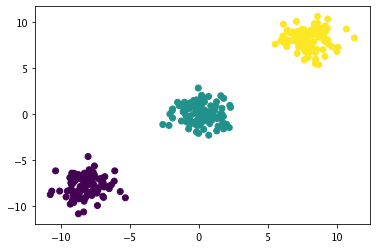

In [2]:
m = np.array((-8,0,8));m
ndim = 2;
nclust = len(m)
clustn = 100
n = (nclust*clustn)

#data = np.zeros((n,ndim))
#c0 = np.zeros(n)
cid = 0
data = np.random.multivariate_normal(mean=np.repeat(m[cid],ndim), cov=np.eye(ndim), size=clustn, check_valid='warn', tol=1e-8)
c0 = np.repeat(cid,clustn)
for cid in range(1,nclust):
    data = np.vstack((data,np.random.multivariate_normal(mean=np.repeat(m[cid],ndim), cov=np.eye(ndim), size=clustn, check_valid='warn', tol=1e-8)))
    c0 = np.hstack((c0,np.repeat(cid,clustn)))
    
plt.scatter(x=data[:,0],y=data[:,1],c=c0);

In [8]:
T = 5 # Truncation
alpha=1
lambda1 = 1
lambda2 = 1
X = data
N,P = X.shape

In [9]:
# Initialise
mean_mu = KMeans(n_clusters=T).fit(X).cluster_centers_[::-1]
cov_mu = np.empty((T, P, P))
for i in range(T):
    cov_mu[i,:,:] = np.eye(P)

gamma1= alpha * np.ones(T)
gamma2 = alpha * np.ones(T)
tau1= np.ones(T)
tau2=np.ones(T)
phi = np.ones((T, N)) / T

In [10]:
Nt = np.sum(phi, axis = 1)

In [11]:
def update_gamma1(gamma1):
    gamma1 = 1 + phi.sum(axis=1)
    return gamma1

def update_gamma2(gamma2):
    gamma2 = [alpha + phi[np.arange(t+1,T),:].sum() for t in range(T)]
    gamma2 = np.array(gamma2)
    return gamma2

def update_tau1(tau1):
    pass

def update_tau2(tau1):
    pass

def update_phi(phi):
    for t in np.arange(T):
        Eq_logVi = gamma1[t]-digamma(gamma1[t]+gamma2[t])
        Eq_log_1minusVi = gamma2[t]-digamma(gamma1[t]+gamma2[t])

In [18]:
for t in np.arange(T):
    Eq_logVi = gamma1[t]-digamma(gamma1[t]+gamma2[t])
    Eq_log_1minusVi = gamma2[t]-digamma(gamma1[t]+gamma2[t])

In [22]:
#lowerbound
Eq_logP_V_alpha = 1

(array([ 8., 15.,  4.,  9., 12.,  7.,  9.,  9., 15., 12.]),
 array([5.84305540e-04, 1.00377241e-01, 2.00170177e-01, 2.99963112e-01,
        3.99756048e-01, 4.99548984e-01, 5.99341919e-01, 6.99134855e-01,
        7.98927790e-01, 8.98720726e-01, 9.98513662e-01]),
 <a list of 10 Patch objects>)

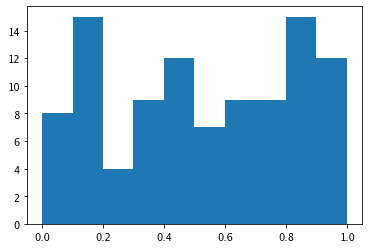

In [62]:
q_gamma = [beta(gamma1[t],gamma2[t]) for t in range(T)]

#plt.hist([q_gamma[0].rvs() for _ in range(100)])